# <center> Artificial Intelligence in Robotics - Laboratory 3 </center>
### <center> By Lennard Rose 5122737 </center>

## <center> T 1 – Prediction with a Discrete Bayes Filter </center>
##### In this computer practical, you are to implement a discrete Bayes filter that accounts for the motion of a robot on a 1-D constrained world.
##### Suppose that the robot lives in a world with 20 cells and is positioned on the 11th cell. The world is bounded, so the robot cannot move to outside of the specified area. Suppose further that in each time step the robot can execute either a move forward or a move backward command. Unfortunately, the robot’s motion is subject to error, so if the robot executes an action it will sometimes fail. When the robot moves forward we know that the following can happen:
##### 1. With a 20% probability the robot will not move
##### 2. With a 60% probability the robot will move to the next cell
##### 3. With a 20% probability the robot will move two cells forward
##### 4. There is a 0% probability of the robot either moving in the wrong direction or more than two cells forward
##### Suppose that the same model applies when moving backward, just in the opposite direction.
##### Since the robot lives on a bounded world, it is constrained by its limits, this changes the motion probabilities on the boundary cells, namely:
##### 1. If the robot is located at the last cell and tries to move forward, it will stay at the same cell with a probability of 100%
##### 2. If the robot is located at the second to last cell and tries to move forward, it will stay at the same cell with a probability of 20%, while it will move to the next cell with a probability of 80%
##### Again, suppose the same model applies when moving backward, just in the opposite direction.


### <center> 1.a [6.0 marks] </center>
##### Implement in Python a discrete Bayes filter as presented in the lecture ”‘Localization Discrete Filter”’, slide 5. A framework containing a stub of the model is provided to you with lab_3_framework.py(*renamed from Lab 3 Framework.py). Comment on the meaning of each line of code. Hints:
##### • Decide which random variables are involved in the motion model and how to cover their values, before you start implementing the filter
##### • The filter can be implemented using only if...else statements, for loops and arithmetic operations
##### • Start with an initial belief of: bel=numpy.hstack((numpy.zeros(11),1,numpy. zeros(8)))
##### • Be careful about the boundaries in the world, those need to be handled ad-hoc. Use zero padding when updating the belief in the cells at the bounds in the world
##### You can check your implementation by noting that the belief must sum to one (with a very small error due to the limited precision of the computer).

The Bayes filter was implemented using the formula from the skript. In general:

$$
bel\_prime[cell] = p(double step) * bel[cell±2] + p(single step) * bel[cell±1] + p(no move) * bel[cell]
$$

with [cell-x] for forward and [cell+x] for backward movement.
So the new belief was calculated based on the old beliefs. bel[cell±2] for example is the previous position after doing a double step. Together with the probability of the action taken p(double step) (All can be find in the constants in my code) bel_prime[cell] is computed. Therefore only the range of +/- 2 steps around the cell are relevant for the computation, because these are the only possible steps (The probabilites of doing more than 2 steps are always zero so we can leave them out).
The edge cases were implemented according to the formula, with changed probabilites.


### <center> 1.b [1.0 marks] </center>
##### Use the discrete_filter function you implemented to estimate the final belief in the robot’s position after it has executed 8 consecutive move forward commands and 3 consecutive move backward commands. Plot the resulting belief on the position of the robot with the plot_and_save function in lab_3_framework.py.
##### Comment on how the initial belief (in terms of its location and spread) compares to the belief after having executed the first move forward command. Put this in relation to the two main effects of the prediction step of a Bayes filter. Save the plots of both beliefs as PDF-files to your lab report.

<Figure size 432x288 with 0 Axes>

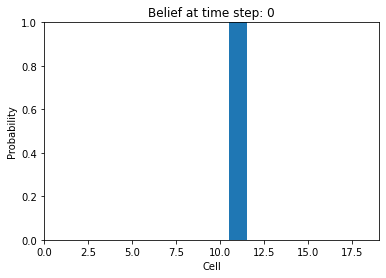

0.0 0.0
Total belief sums up to 1.0


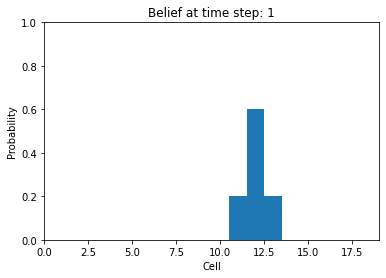

0.0 0.0
Total belief sums up to 1.0


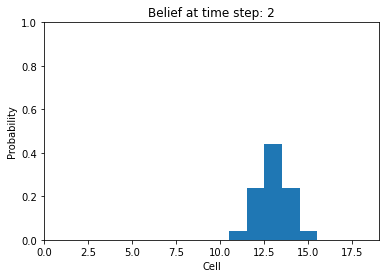

0.0 0.0
Total belief sums up to 1.0


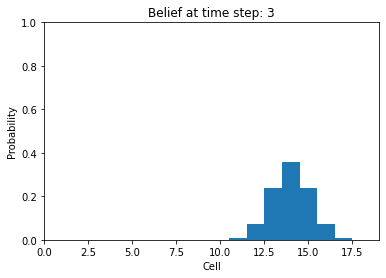

0.0 0.0
Total belief sums up to 1.0


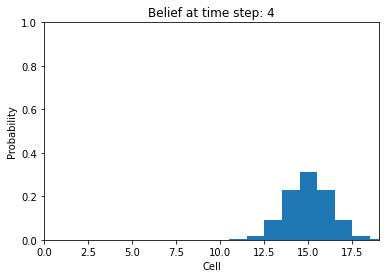

0.019200000000000005 0.0016000000000000005
Total belief sums up to 1.0000000000000002


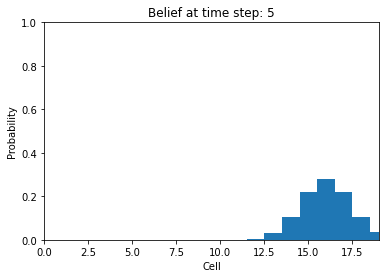

0.10560000000000001 0.03552
Total belief sums up to 1.0


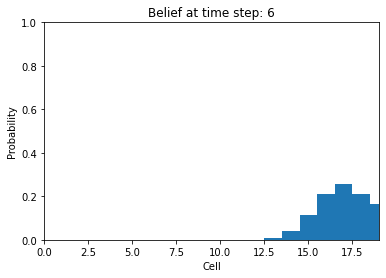

0.208512 0.16384
Total belief sums up to 1.0


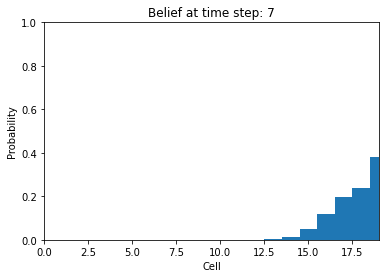

0.2365824 0.3817088
Total belief sums up to 1.0


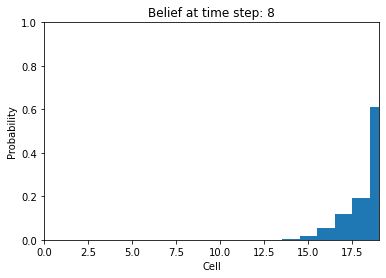

0.1901568 0.6107392
Total belief sums up to 1.0


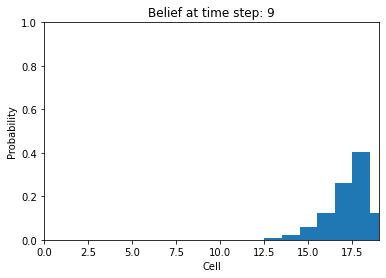

0.40447488000000004 0.12214784000000001
Total belief sums up to 1.0


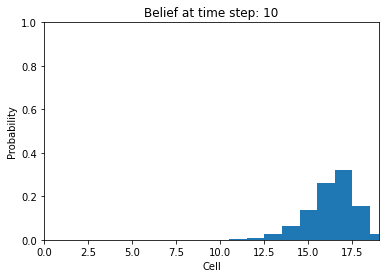

0.15418368 0.024429568000000002
Total belief sums up to 1.0


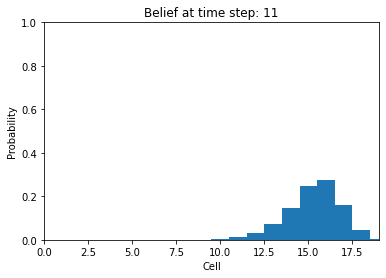

In [1]:
import lab_3_framework
lab_3_framework.main()

After initialization the robot is definitely located at cell number 11. Therefore the value of the 11th cell is 1 and that of every other cell is 0.

![alt text](output/original_values/png/belief_at_time_step_0.png)

After the first step the belief diverges into three different possible cells. The three cells probabilities reflect the probability of our possible actions.
The 11th cell has the value 0.2, calculated by the initial belief of 1 times the probability of "Stand"(0.2).
The 12th cell has the value 0.6, calculated by the initial belief of 1 of its origin (where it was before) times the probability of "Move one step"(0.6).
The 13th cell has the value 0.2, calculated by the initial belief of 1 of its origin (where it was before) times the probability of "Move two steps"(0.2).
All other cells stay with the value 0, because they are unreachable with the set of possible actions.
With the initial value of one it is easy to see what happens. As we move forward, the possible positions "spread" because there are multiple options to "land". Doing one step is the most probable option, explaining the bump. If one step was the only option, the "bar" would simply shift from the 11th to the 12th cell.

![alt text](output/original_values/png/belief_at_time_step_1.png)

### <center> 1.c [1.0 marks] </center>
##### Comment on how the belief evolves (in terms of its location and spread) between the forth and last move forward command. Besides, does the spread of the distribution develop equally on both sides of the peak? Why? Save the plots of the beliefs after the forth and after the last move forward command as PDF-files to your lab report.

For the first steps, the distribution spreads equally around the center which is always located on the next step cell. This is because the double step, as well as no movement can occur with 20% probability.

![alt text](output/original_values/png/belief_at_time_step_4.png)

When the robot reaches the end (Cell 20) of the 1-D world, this is no longer true. The belief of the robot to be located at the last cell increases with each additional step. After more steps, depending on how much steps it did before possibly reaching the last cell, the belief of being in the last cell will eventually add up to around one (probability of standing for every timestep becoming infinitely small).

![alt text](output/original_values/png/belief_at_time_step_8.png)

### <center> 1.d [1.0 marks] </center>
##### Comment on how the belief evolves (in terms of its location and spread) between the last move forward command and the second move backward command. Besides, does the spread of the distribution develop equally on both sides of the peak? Why? Save the plots of the beliefs after the last move forward command and after the second move backward command as PDF-files to your lab report.


![alt text](output/original_values/png/belief_at_time_step_8.png)

Now with having "space to go" in the moving direction, the distribution begins to spread again. With the same movement probabilities (0.2, 0.6, 0.2) as in the beginning, the high belief in the last cell starts to lower, leading to a more even distributed spread around a center.

![alt text](output/original_values/png/belief_at_time_step_10.png)

### <center> 1.e [1.0 marks] </center>
##### Comment on the effect of changing the errors in the move forward and move backward commands to
##### 1. 30% probability that the robot will not move
##### 2. 40% probability that the robot will move to the next cell
##### 3. 30% probability that the robot will move two cells forward
##### 4. 0% probability of the robot either moving in the wrong direction or more than two cells forwards

<Figure size 432x288 with 0 Axes>

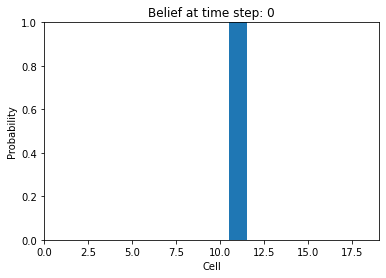

0.0 0.0
Total belief sums up to 1.0


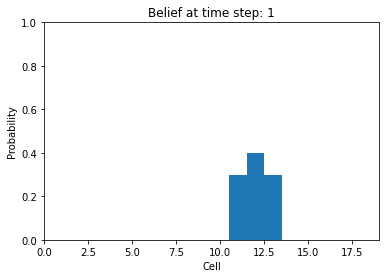

0.0 0.0
Total belief sums up to 0.9999999999999999


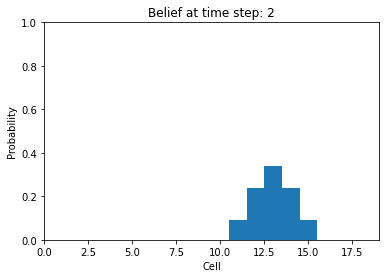

0.0 0.0
Total belief sums up to 1.0


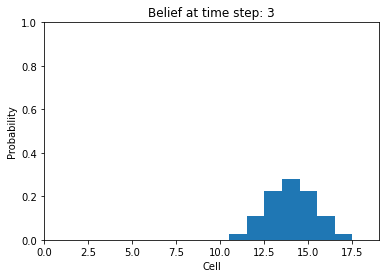

0.0 0.0
Total belief sums up to 0.9999999999999999


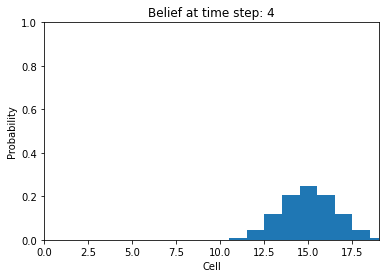

0.04319999999999999 0.0081
Total belief sums up to 0.9999999999999998


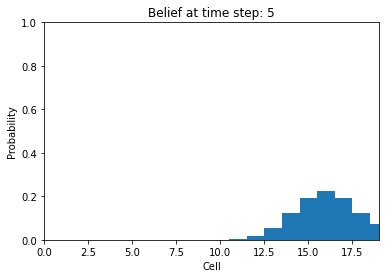

0.12239999999999998 0.07397999999999999
Total belief sums up to 0.9999999999999998


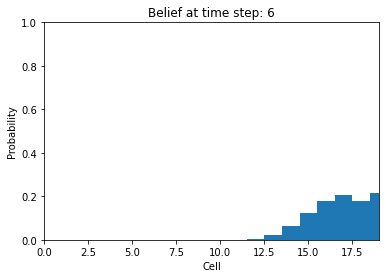

0.18043199999999998 0.21734999999999996
Total belief sums up to 1.0


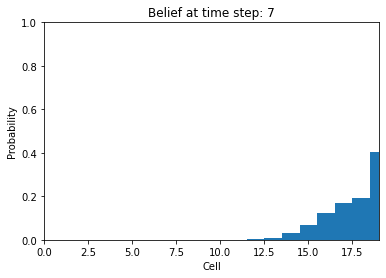

0.1900336 0.40498319999999993
Total belief sums up to 1.0


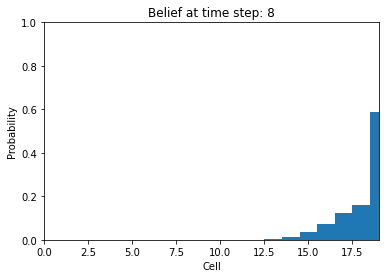

0.16196639999999998 0.58915075
Total belief sums up to 1.0


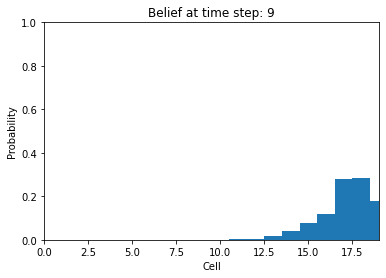

0.28425022 0.17674522499999998
Total belief sums up to 1.0


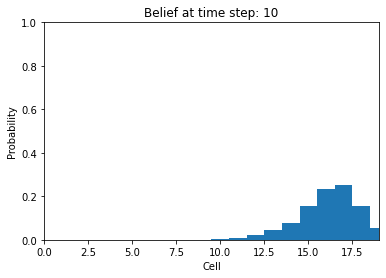

0.155973156 0.05302356749999999
Total belief sums up to 1.0000000000000002


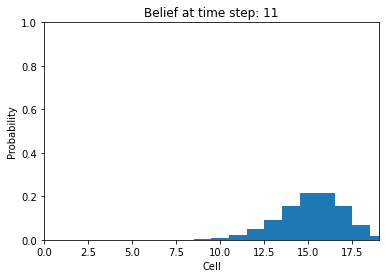

In [2]:
lab_3_framework.change_probabilites()
lab_3_framework.main()

With the changed probabilities, the center (which, at least until reaching the end, indicates constantly taking one step) stays "lower", leading to a more even but wider distribution (flatter bell-shape). The general behaviour of the moving distribution of beliefs does not change.

# Attached Code

### lab_3_framework.py

In [ ]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt

"""
T 1 -- Prediction with a Discrete Bayes Filter
"""

plt.ion()

"""
CONSTANTS
1.a
"""
# With a 20% probability the robot will not move
PROBABILITY_NO_MOVE = 0.2
# With a 60% probability the robot will move to the next cell
PROBABILITY_NEXT_CELL = 0.6
# With a 20% probability the robot will move two cells forward
PROBABILITY_TWO_CELLS = 0.2
# There is a 0% probability of the robot either moving in the wrong direction or more than two cells forward
# just for completeness
PROBABILITY_WRONG_DIRECTION_OR_MOVE_3_PLUS = 0.0
# If the robot is located at the last cell and tries to move forward,
# it will stay at the same cell with a probability of 100%
PROBABILITY_STAY_IN_LAST_CELL = 1.0
# If the robot is located at the second to last cell and tries to move forward,
# it will stay at the same cell with a probability of 20%,
# while it will move to the next cell with a probability of 80%
PROBABILITY_NEXT_CELL_IF_ONLY_ONE_AHEAD = 0.8
PROBABILITY_NO_MOVE_IF_ONLY_ONE_AHEAD = 0.2

# for plotting, see below
values = "original_values"

"""
1.e
"""
# Convenietly change constants
def change_probabilites():
    global PROBABILITY_NEXT_CELL
    PROBABILITY_NEXT_CELL = 0.4
    global PROBABILITY_TWO_CELLS
    PROBABILITY_TWO_CELLS = 0.3
    global PROBABILITY_NO_MOVE
    PROBABILITY_NO_MOVE = 0.3
    # NOTE: Not specified in the task but belief does not sum up to 1 if I use the values beforde
    # calculated as PROBABILITY_NEXT_CELL + PROBABILITY_TWO_CELLS
    global PROBABILITY_NEXT_CELL_IF_ONLY_ONE_AHEAD
    PROBABILITY_NEXT_CELL_IF_ONLY_ONE_AHEAD = 0.7
    # calulated as 1 - PROBABILITY_NEXT_CELL_IF_ONLY_ONE_AHEAD
    global PROBABILITY_NO_MOVE_IF_ONLY_ONE_AHEAD
    PROBABILITY_NO_MOVE_IF_ONLY_ONE_AHEAD = 0.3
    global values
    values = "changed_values"

"""
1.a
"""
def discrete_filter(bel, d):
    """ Parameters:
    bel = [cell_0, ... , cell_19]
    d = "f" for move forward and "b" for move backward
    The discrete bayes filter was implementet according to the formulas in the lecture slides:
    Lecture 10.pdf "Localization – Discrete Filter"
    """

    # Constants and functions for readability
    #boundaries
    FIRST_CELL = 0
    LAST_CELL = len(bel) - 1

    # new beliefs
    bel_prime = np.zeros(bel.shape[0])

    print(bel[LAST_CELL - 1] , bel[LAST_CELL])

    # check if in first or last cell depending of direction moving
    def on_the_edge_cell():
        return (CURRENT_CELL == LAST_CELL and d == "f") or (CURRENT_CELL == FIRST_CELL and d == "b")

    # check if out of bounds if doing movement forwards
    def possible_to_move_x_steps_if_moving_forward(x):
        return d == "f" and CURRENT_CELL >= FIRST_CELL + x

    # check if out of bounds if doing movement backwards
    def possible_to_move_x_steps_if_moving_backwards(x):
        return d == "b" and CURRENT_CELL <= LAST_CELL - x

    # for readability
    def CURRENT_CELLS_BELIEF():
        return bel[CURRENT_CELL]

    # for readability
    def CELLS_BELIEF(no_steps):
        return bel[CURRENT_CELL + no_steps]


    # Loop over believe vector
    for CURRENT_CELL in range(FIRST_CELL, LAST_CELL + 1):
        # initialize probabilities
        PROBABILITY_SINGLE_STEP = 0
        PROBABILITY_DOUBLE_STEP = 0

        # Check if a double step is possible
        if possible_to_move_x_steps_if_moving_forward(x=2):
            PROBABILITY_DOUBLE_STEP = CELLS_BELIEF(no_steps=-2)

        if possible_to_move_x_steps_if_moving_backwards(x=2):
            PROBABILITY_DOUBLE_STEP = CELLS_BELIEF(no_steps=2)

        # Check if a single step is possible
        if possible_to_move_x_steps_if_moving_backwards(x=1):
            PROBABILITY_SINGLE_STEP = CELLS_BELIEF(no_steps=1)

        if possible_to_move_x_steps_if_moving_forward(x=1):
            PROBABILITY_SINGLE_STEP = CELLS_BELIEF(no_steps=-1)

        # if no double step is possible, compute with the probabilities for only one possible step
        if on_the_edge_cell():
            bel_prime[CURRENT_CELL] = PROBABILITY_TWO_CELLS * PROBABILITY_DOUBLE_STEP \
                                      + PROBABILITY_NEXT_CELL_IF_ONLY_ONE_AHEAD * PROBABILITY_SINGLE_STEP \
                                      + PROBABILITY_STAY_IN_LAST_CELL * CURRENT_CELLS_BELIEF()

        # if single and double step is possible, compute with the probability of two steps possible
        else:
            bel_prime[CURRENT_CELL] = PROBABILITY_TWO_CELLS * PROBABILITY_DOUBLE_STEP \
                                      + PROBABILITY_NEXT_CELL * PROBABILITY_SINGLE_STEP \
                                      + PROBABILITY_NO_MOVE * CURRENT_CELLS_BELIEF()

    return bel_prime

def plot_and_save(bel, i):
    global values
    plt.cla()
    plt.bar(range(0, bel.shape[0]), bel, width=1.0)
    plt.title(f"Belief at time step: {i}")
    plt.xlabel("Cell")
    plt.ylabel("Probability")
    plt.axis([0, bel.shape[0] - 1, 0, 1])
    plt.draw()
    plt.savefig("output/" + values + "/pdf/belief_at_time_step_" + str(i) + ".pdf")
    plt.savefig("output/" + values + "/png/belief_at_time_step_" + str(i) + ".png")
    plt.pause(1)


def main():
    bel = np.hstack((np.zeros(11), 1, np.zeros(8)))

    plt.figure()
    plt.ion()
    plt.show()

    move_forward_no = 8
    move_backward_no = 3

    for i in range(0, move_forward_no):
        plot_and_save(bel, i)
        bel = discrete_filter(bel, "f")
        print("Total belief sums up to", np.sum(bel))

    for i in range(0, move_backward_no):
        plot_and_save(bel, move_forward_no + i)
        bel = discrete_filter(bel, "b")
        print("Total belief sums up to", np.sum(bel))

    plot_and_save(bel, move_forward_no + move_backward_no)

    plt.ioff()
    plt.show()


#if __name__ == "__main__":
#    main()